#50 Startups

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import pandas.util.testing as tm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
start_df=pd.read_csv('/content/drive/MyDrive/Asignments_DS/50_Startups.csv')
start_df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
start_df.info()

In [5]:
start_df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
start_df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [ ]:
#Creating dummy variables for Columns State

In [7]:
df1= pd.get_dummies(start_df,columns=['State'])

In [8]:
df1

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [9]:
df1.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_California', 'State_Florida', 'State_New York'],
      dtype='object')

In [10]:
df1 = df1.rename({'R&D Spend':'rnd', 'Administration':'admin', 'Marketing Spend':'ms', 'Profit':'p',
       'State_California':'ca', 'State_Florida':'fl', 'State_New York':'ny'},axis=1)

In [11]:
df1.columns

Index(['rnd', 'admin', 'ms', 'p', 'ca', 'fl', 'ny'], dtype='object')

In [12]:
df1[df1.duplicated()].shape #checking for duplicates

(0, 7)

In [15]:
corr=df1.corr()
corr.style.background_gradient(cmap='coolwarm')


,rnd,admin,ms,p,ca,fl,ny
rnd,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
admin,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
ms,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
p,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
ca,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
fl,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
ny,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


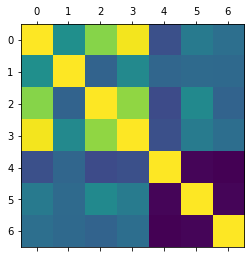

In [16]:
plt.matshow(df1.corr())

#Building a regression Model

In [17]:
model1 = smf.ols('p~rnd+admin+ms+ca+fl+ny',data=df1).fit()

In [18]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 25 Feb 2021   Prob (F-statistic):           1.34e-27
Time:                        04:22:52   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
rnd            0.8060      0.046     17.369      0.000       0.712       0.900
admin         -0.0270      0.052     -0.517      0.608      -0.132       0.078
ms             0.0270      0.017      1.574      0.123      -0.008       0.062
ca          1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
fl          1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
ny          1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     4.69e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.76e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

As we can observe from /model, admin and ms seems insignificant

In [19]:
model1a = smf.ols('p~admin',data=df1).fit()

In [20]:
model1a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 25 Feb 2021   Prob (F-statistic):              0.162
Time:                        04:33:37   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Admin seems insignificant

In [21]:
model1b = smf.ols('p~ms',data=df1).fit()

In [22]:
model1b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 25 Feb 2021   Prob (F-statistic):           4.38e-10
Time:                        04:34:47   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
ms             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#ms seems significant

#Proceeding for model deletion dignostics now
Cook's distance
Iteration -1

In [23]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


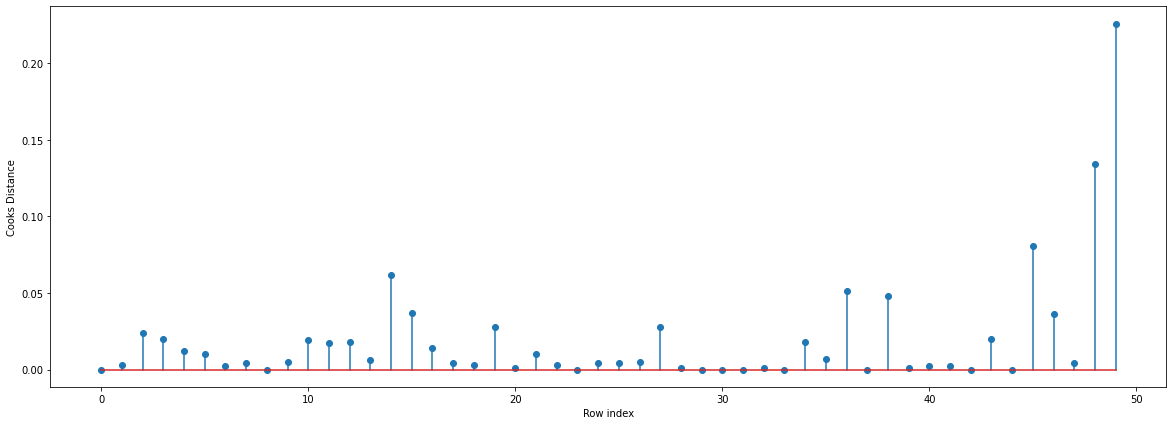

In [25]:
import numpy as np
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [26]:
np.argmax(c),np.max(c)

(49, 0.22625094501509233)

In [27]:
df2 = df1.drop([49],axis=0).reset_index()

In [28]:
df2 = df2.drop(['index'],axis=1)

In [29]:
model2 = smf.ols('p~rnd+admin+ms+ca+fl+ny',data=df2).fit()

In [30]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Thu, 25 Feb 2021   Prob (F-statistic):           2.51e-29
Time:                        04:37:07   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.915e+04   4249.909      9.213      0.000    3.06e+04    4.77e+04
rnd            0.7836      0.039     20.056      0.000       0.705       0.862
admin         -0.0220      0.044     -0.505      0.616      -0.110       0.066
ms             0.0258      0.014      1.804      0.078      -0.003       0.055
ca          1.422e+04   2081.663      6.833      0.000       1e+04    1.84e+04
fl          1.266e+04   2276.728      5.561      0.000    8068.684    1.73e+04
ny          1.227e+04   2076.431      5.909      0.000    8082.828    1.65e+04
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     4.79e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.68e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#Rsquared value has increased, ms and admin are still insignificant
Iteration 2

In [31]:

model_influence = model2.get_influence()
(c1, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


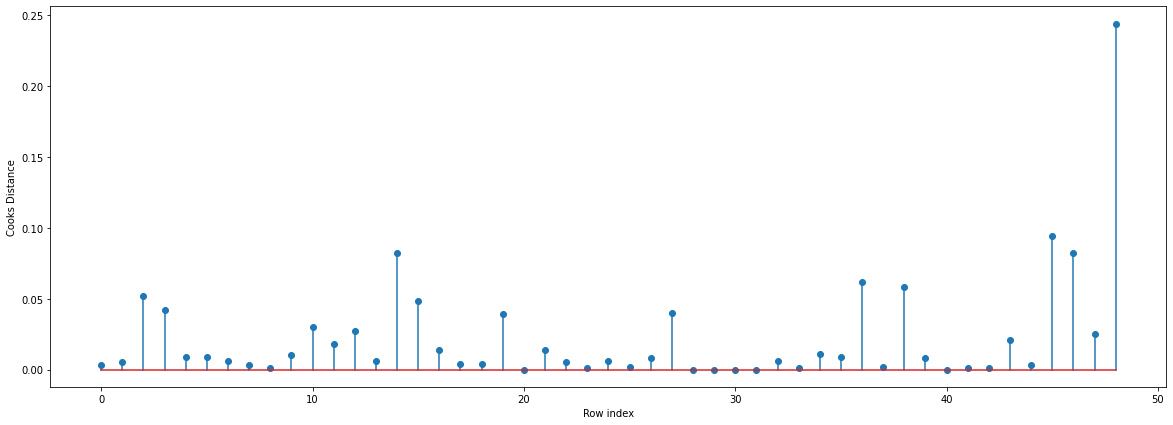

In [32]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df2)), np.round(c1, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [33]:

np.argmax(c1),np.max(c1)

(48, 0.24352817571403806)

In [34]:
df3 = df2.drop([48],axis=0).reset_index()

In [35]:
df3 = df3.drop(['index'],axis=1)

In [36]:
model3= smf.ols('p~rnd+admin+ms+ca+fl+ny',data=df3).fit()

In [37]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     217.6
Date:                Thu, 25 Feb 2021   Prob (F-statistic):           7.02e-29
Time:                        04:40:25   Log-Likelihood:                -493.23
No. Observations:                  48   AIC:                             998.5
Df Residuals:                      42   BIC:                             1010.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.409e+04   4569.825      9.648      0.000    3.49e+04    5.33e+04
rnd            0.7888      0.037     21.160      0.000       0.714       0.864
admin         -0.0621      0.045     -1.381      0.174      -0.153       0.029
ms             0.0179      0.014      1.275      0.209      -0.010       0.046
ca           1.53e+04   2035.915      7.516      0.000    1.12e+04    1.94e+04
fl          1.415e+04   2261.128      6.259      0.000    9588.163    1.87e+04
ny          1.464e+04   2223.793      6.581      0.000    1.01e+04    1.91e+04
==============================================================================
Omnibus:                        0.267   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.875   Jarque-Bera (JB):                0.453
Skew:                           0.108   Prob(JB):                        0.797
Kurtosis:                       2.576   Cond. No.                     2.32e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.16e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

RSquared Values has been increased , but admin and ms are still insignificant
Since cook's distance of most of the points seems to lie in the same range, hence we can conculde that there are no more influence points

In [38]:
#Checking VIF value to see if there's some collinearity in the variables

rsq_rnd = smf.ols("rnd~admin+ms", data= df3).fit().rsquared
ViF_rnd = 1/(1-rsq_rnd)

rsq_adm = smf.ols("admin~rnd+ms", data=df3).fit().rsquared
ViF_adm = 1/(1-rsq_adm)

rsq_mar = smf.ols("ms~admin+rnd", data= df3).fit().rsquared
ViF_mar = 1/(1-rsq_mar)

d1 = {'Variables':['rnd','admin','ms'],'VIF':[ViF_rnd,ViF_adm,ViF_mar]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,rnd,2.250972
1,admin,1.196016
2,ms,2.229867


In [ ]:
#VIF below 10, no major collinearity

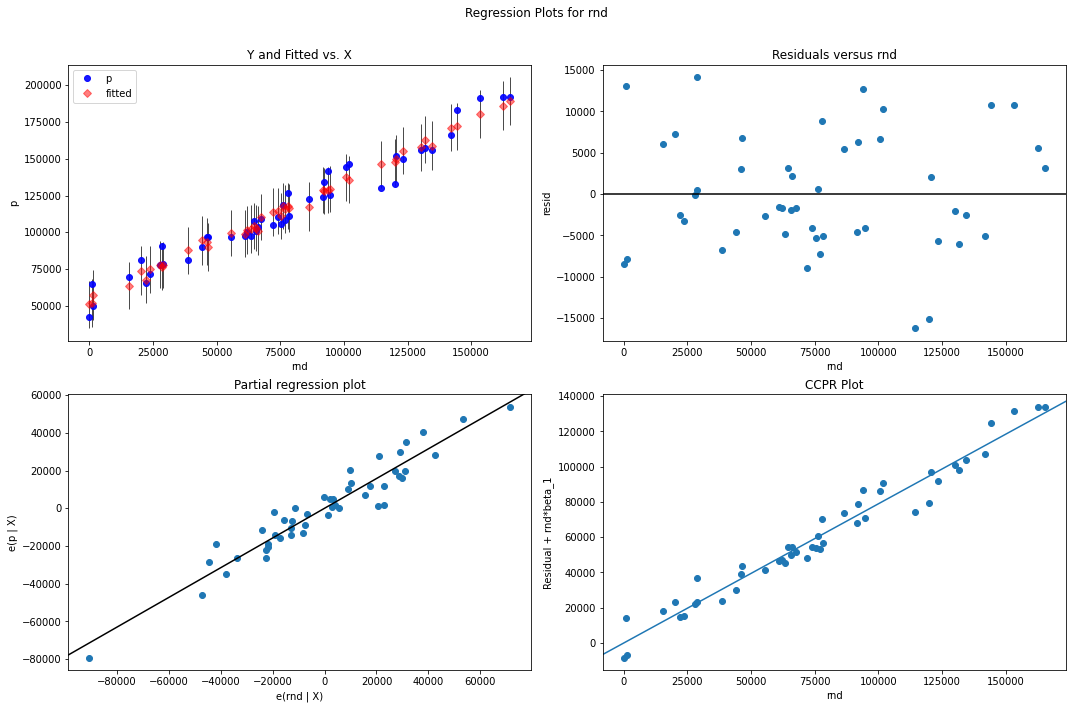

In [39]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model3, "rnd", fig=fig)
plt.show()

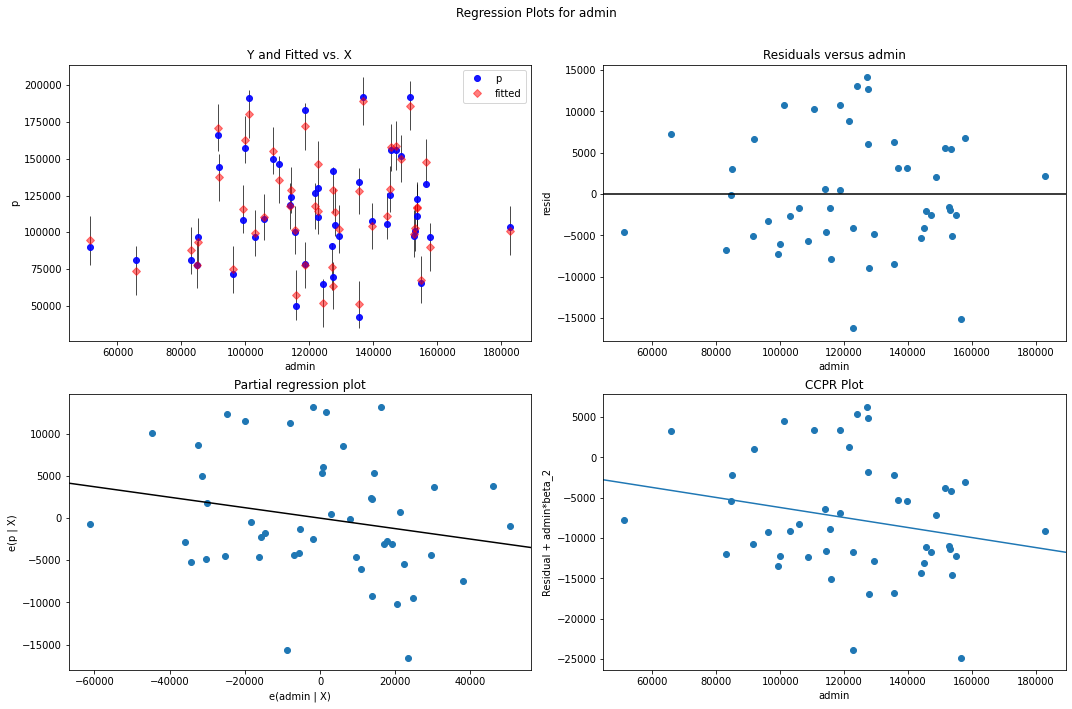

In [40]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model3, "admin", fig=fig)
plt.show()

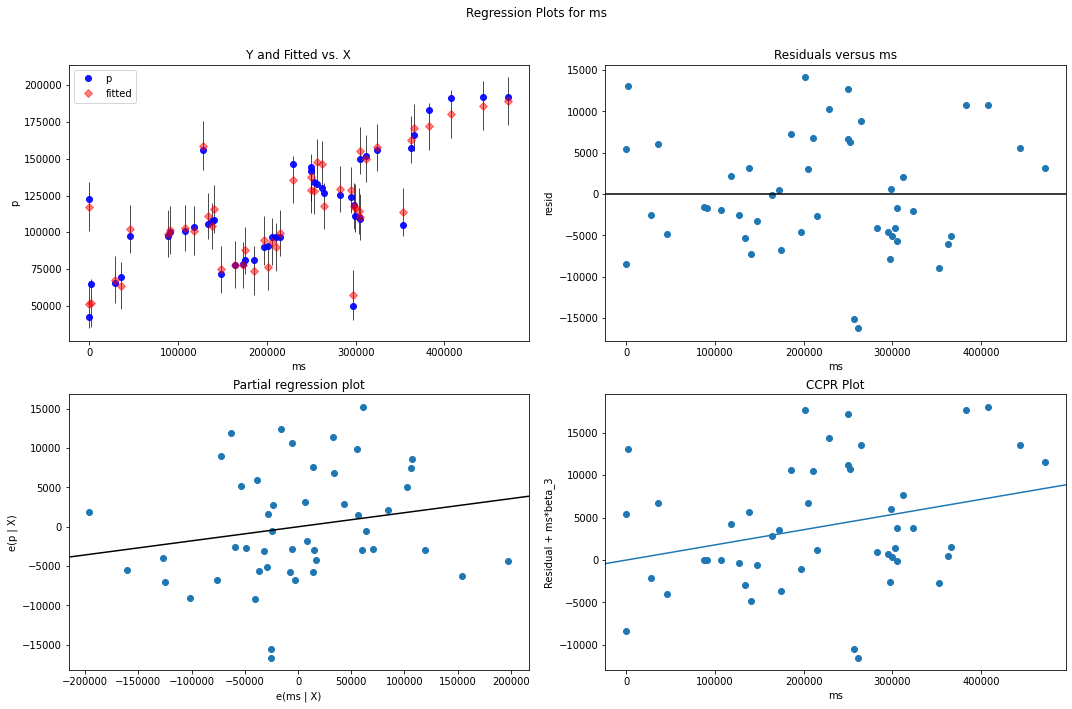

In [41]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model3, "ms", fig=fig)
plt.show()

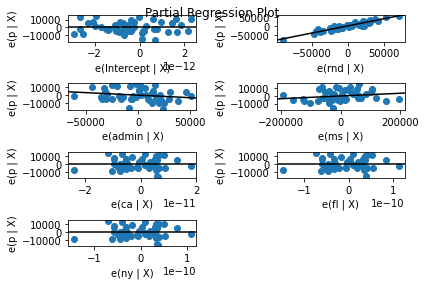

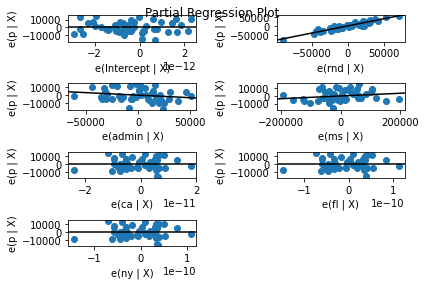

In [42]:
sm.graphics.plot_partregress_grid(model3)

In [44]:
#Since the correlation of admin with profit is less, and also as per the p-value, it's insignificant, hence we can drop the admin variable

In [45]:
final_model= smf.ols('p~rnd+ms+ca+fl+ny',data=df3).fit()

In [46]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     265.9
Date:                Thu, 25 Feb 2021   Prob (F-statistic):           1.02e-29
Time:                        04:43:46   Log-Likelihood:                -494.30
No. Observations:                  48   AIC:                             998.6
Df Residuals:                      43   BIC:                             1008.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.83e+04   1841.077     20.803      0.000    3.46e+04     4.2e+04
rnd            0.7692      0.035     22.072      0.000       0.699       0.840
ms             0.0251      0.013      1.908      0.063      -0.001       0.052
ca          1.353e+04   1599.496      8.461      0.000    1.03e+04    1.68e+04
fl          1.216e+04   1761.727      6.904      0.000    8609.549    1.57e+04
ny           1.26e+04   1685.592      7.478      0.000    9204.975     1.6e+04
==============================================================================
Omnibus:                        0.133   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.936   Jarque-Bera (JB):                0.304
Skew:                           0.097   Prob(JB):                        0.859
Kurtosis:                       2.661   Cond. No.                     1.51e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.44e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#Test for Normality of Residuals (Q-Q Plot)

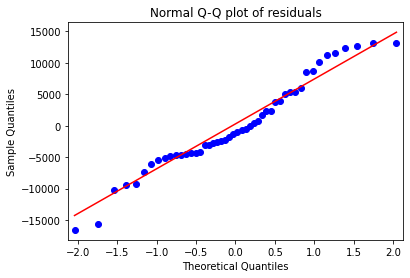

In [47]:
qqplot=sm.qqplot(final_model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

#Residual Plot for Homoscedasticity

In [48]:
#Residual Plot for Homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

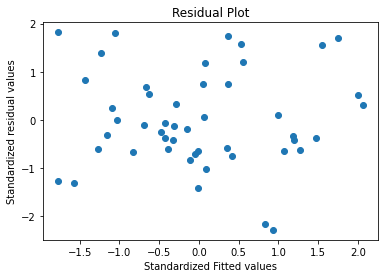

In [49]:
plt.scatter(get_standardized_values(final_model.fittedvalues),
            get_standardized_values(final_model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()